<a href="https://colab.research.google.com/github/YorkWestenhaver/RL/blob/main/An%20AI%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The RL Model
---
Relevant Features:
*   **Deep RL** + **Search**
*   Characterized as a **SOMDP** (Semi-Observable Markov Decision Process)


### 1. Explanations, **Theory** & Math

In `Reinforcement Learning` (`RL`), a decision-making agent must learn to interact with an environment, through a series of actions, in order to maximize it's expected long-term return.

This interaction is formalized using the framework of a `Markov Decision Process` $\color{cyan}{M}$ 
> *see the section on Markov Decision Processes for more info*

#### i. **Explanation**: `World States` & `Histories`




1. Here we consider a game with $\mathcal{\color{salmon}{N}}= \{1,2,...,\color{salmon}{N}\}$ `Agents`.

2. A state in the game is referred to as the `World State` **$\color{cadetblue}{w} \in \mathcal{\color{cadetblue}{W}}$**.

3. The `Space of Joint Actions` is $\mathcal{\color{red}{A}} = $ $\mathcal{\color{red}{A}}_{1}$ x $\mathcal{\color{red}{A}}_{2}$ x $\mathcal{\color{red}{A}}_{3}$ x ...  x $\mathcal{\color{red}{A}}_{\color{salmon}{N}}$ where
> $\mathcal{\color{red}{A}}_{\color{magenta}{i}}(\color{cadetblue}{w})$ denotes the set of *legal* `actions` for agent $\color{magenta}{i}$ at `world state` $\color{cadetblue}{w}$ and
> 
> $\color{red}{a} = (\color{red}{a}_{1}, \color{red}{a}_{2},...,\color{red}{a}_{\color{salmon}{N}}) \in \mathcal{\color{red}{A}}$ denotes a `joint action`.
4. After a joint action $\color{red}{a}$ is chosen, a `transition function` $\mathcal{\color{plum}{T}}$ determines the Next `World State` $\color{cadetblue}{w}^{'}$ drawn from the probability distribution $\mathcal{\color{plum}{T}}(\color{cadetblue}{w},\color{red}{a}) \in \Delta \mathcal{\color{cadetblue}{W}}$.
>$\color{cadetblue}{w} \Longrightarrow \color{cadetblue}{w}^{'}$

5. After `joint action` $\color{red}{a}$, agent $\color{magenta}{i}$ recieves a `Reward` $\mathcal{\color{gold}{R}}_{\color{magenta}{i}}(\color{cadetblue}{w},\color{red}{a})$.

6. Upon a `world state` transition from $\color{cadetblue}{w}$ to $\color{cadetblue}{w}^{'}$ via joint action $\color{red}{a}$, `agent` $\color{magenta}{i}$ recieves two `observations`
    
    *   the `Private Observation` from the function:
    > $\mathcal{\color{indigo}{O}}_{priv}(\color{cadetblue}{w},\color{red}{a},\color{cadetblue}{w}^{'})$
    
    *  the `Public Observation` from the function:
    > $\mathcal{\color{indigo}{O}}_{pub}(\color{cadetblue}{w},\color{red}{a},\color{cadetblue}{w}^{'})$

7. A `History`, also called the trajectory, is a finite set of legal `actions` and `world states`, denoted $\color{royalblue}{h} = (\color{cadetblue}{w}^{0}, \color{red}{a}^{0}, \color{cadetblue}{w}^{1}, \color{red}{a}^{1},...,\color{cadetblue}{w}^{t})$.

8. An `Infostate` $\color{limegreen}{s}$, also called an `action-observation history` (AOH) for agent $\color{magenta}{i}$ is a sequence of an `agents`'s `Observations` and `Actions`.

    *   $\color{limegreen}{s}_{\color{magenta}{i}} = (\mathcal{\color{indigo}{O}}_\color{magenta}{i}^0, \color{red}{a}_\color{magenta}{i}^0, \mathcal{\color{indigo}{O}}_\color{magenta}{i}^1, \color{red}{a}_\color{magenta}{i}^1,...,\mathcal{\color{indigo}{O}}_\color{magenta}{i}^t)$
    
    where
$$\mathcal{\color{indigo}{O}}_\color{magenta}{i}^k=\Big(\mathcal{\color{indigo}{O}}_{priv(\color{magenta}{i})}\big(\color{cadetblue}{w}^{k-1},\color{red}{a}^{k-1},\color{cadetblue}{w}^{k}\big), \mathcal{\color{indigo}{O}}_{pub(\color{magenta}{i})}\big(\color{cadetblue}{w}^{k-1},\color{red}{a}^{k-1},\color{cadetblue}{w}^{k}\big)\Big)$$
    *   The unique `infostate` for `history` $\color{royalblue}{h}$ for `agent` $\color{magenta}{i}$ is denoted $\color{limegreen}{s}_\color{magenta}{i}(\color{royalblue}{h})$, and the set of `histories` that correspond to $\color{limegreen}{s}_\color{magenta}{i}$ is denoted $\mathcal{\color{royalblue}{H}}(\color{limegreen}{s}_\color{magenta}{i})$

9.   The `Public State`, denoted $\color{limegreen}{s}_{\text{pub}}$ is a sequence $\big(\mathcal{\color{indigo}{O}}_{\text{pub}}^0, \mathcal{\color{indigo}{O}}_{\text{pub}}^1,..., \mathcal{\color{indigo}{O}}_{\text{pub}}^t\big)$

#### ii. **Explanation**: `Policies` & `Subgames`

1.   An `Agents` Policy $\color{orange}{\pi}_\color{magenta}{i}$ is a function mapping from an `infostate` to a probability distribution over the possible `actions`.
> $\color{limegreen}{s}_\color{magenta}{i} \Longrightarrow^{\color{orange}{\pi}_\color{magenta}{i}} \mathcal{\color{red}{A}}_\color{magenta}{i}(\color{cadetblue}{w})$


2.   A **Policy Profile** $\color{orange}{\pi}$ is a tuple of `policies` $\big(\color{orange}{\pi}_\color{black}{1}, \color{orange}{\pi}_\color{black}{2},..., \color{orange}{\pi}_\color{salmon}{N}\big)$ which, when in Nash Equilibrium, is a profile such that no `agent` $\color{magenta}{i}$ can achieve a higher EV by change policy.
    *   $\color{orange}{\pi}^*$ is the notation for a nash Equilibrium Policy Profile.
    *   $\color{orange}{\pi}^*_\color{magenta}{i}$ is the notation for a `Nash Equilibrium Policy` for `agent` $\color{magenta}{i}$.

3.   A **Subgame** is defined by root `history` $\color{royalblue}{h}$ as all `histories` that can be reached going forward.
    *   a **Depth-Limited Subgame** is a `subgame` that only extends for a limited number of `actions` into the future.
    *   a **Leaf Node** is a `subgame` that has no legal `actions` left *(it is at the bottom of the tree)*




#### iii. **Explanation**: Transforming `World States` into `Public Belief States (PBS)`

A PBS is described by a joint probability distribution over the Agent's possible infostates. Formally, 


1.   Given that $\color{limegreen}{S}_\color{magenta}{i}(\color{limegreen}{s}_{\text{pub}})$ is the set of possible `infostates` that agent $\color{magenta}{i}$ may be in, given a `public state` $\color{limegreen}{s}_{\text{pub}}$.
2.   and that $\Delta \color{limegreen}{S}_\color{magenta}{i}(\color{limegreen}{s}_{\text{pub}})$ denotes the *probablity distribution* over those possible `infostates` of $\color{limegreen}{S}_\color{magenta}{i}(\color{limegreen}{s}_{\text{pub}})$

then `Public Belief State` $\color{purple}{\beta} = \big(\Delta \color{limegreen}{S}_{1}(\color{limegreen}{s}_{\text{pub}}), ..., \color{limegreen}{S}_\color{salmon}{N}(\Delta\color{limegreen}{s}_{\text{pub}})\big)$.

>*Note: In perfect information games, the discrete representation and the belief representation are identical.*




---

The `Value` $\color{tan}{V}$ for `Agent` $\color{magenta}{i}$ of PBS $\color{purple}{\beta}$ when all `agents` play `policy profile` $\color{orange}{\pi}$ is:

$$\color{tan}{V}_\color{magenta}{i}^\color{orange}{\pi}(\color{purple}{\beta})= \sum_{\color{royalblue}{h} \in \mathcal{\color{royalblue}{H}}(\color{limegreen}{s}_{\text{pub}}(\color{purple}{\beta}))}\big(p(\color{royalblue}{h}|\color{purple}{\beta})\big) * \color{tan}{v}_\color{magenta}{i}^\color{orange}{\pi}(\color{royalblue}{h})$$



> In `Two-Player-Zero-Sum` (`2p0s`) games, every PBS $\color{purple}{\beta}$ has a unique value $\color{tan}{V}_\color{magenta}{i}(\color{purple}{\beta})$ for each agent $\color{magenta}{i}$.

and

> In `Two-Player-Zero-Sum` (`2p0s`) games, $\color{tan}{V}_{1}(\color{purple}{\beta})=-\color{tan}{V}_{2}(\color{purple}{\beta})$, meaning that one player must win at the expense of the other.



#### iv. **Explanation**: `Searching` for `PBSs`

In `2p0s` games, the resultant high-dimensional belief representations are `convex optimization` problems; this allows for `gradient-descent`-like algorithms to search the space.

> The search algorithms require the `Values` of the `Leaf Node`'s `infostates` for `PBSs`.

In a `2p0s` game, the `Value` of `Infostate` $\color{limegreen}{s}_\color{magenta}{i}$ in $\color{purple}{\beta}$ assuming all other `agents` play `Nash Equilibrium` $\color{orange}{\pi}^*$ is the maximum `Value` that `agent` $\color{magenta}{i}$ could obtain for any $\color{limegreen}{s}_\color{magenta}{i}$ through any `policy` in the `subgame` rooted at $\color{purple}{\beta}$. 

Formally,

$$\color{tan}{v}_\color{magenta}{i}^\color{orange}{\pi^{\color{black}{*}}}\big(\color{limegreen}{s}_\color{magenta}{i}|\color{purple}{\beta}\big)= \sum_{\color{royalblue}{h} \in \mathcal{\color{royalblue}{H}}(\color{limegreen}{s}_\color{magenta}{i})}p\big(\color{royalblue}{h}|\color{limegreen}{s}_\color{magenta}{i}, \color{purple}{\beta_{\color{black}{-}\color{magenta}{i}}}\big) * \color{tan}{v}_\color{magenta}{i}^{\langle  \color{orange}{\pi_{\color{magenta}{i}}\color{black}{,}\pi_{\color{black}{-}\color{magenta}{i}}}^{\color{black}{*}}\rangle}(\color{royalblue}{h})$$

Where:
1.   $p\big(\color{royalblue}{h}|\color{limegreen}{s}_\color{magenta}{i}, \color{purple}{\beta_{\color{black}{-}\color{magenta}{i}}}\big)$ is the probability of being in history $\color{royalblue}{h}$, assuming $\color{limegreen}{s}_\color{magenta}{i}$ is reached and
2.   the `joint probability distribution` over `infostates` for `agents` other than $\color{magenta}{i}$ is $\color{purple}{\beta}_{-\color{magenta}{i}}$.

---

Thus, rather than learn a PBS Value Function, we instead use an `Infostate-Value Function` $\hat{\color{tan}{v}}: \mathcal{B} \rightarrow \mathbb{R}^{\lvert \color{limegreen}{S}_1 \rvert+\lvert \color{limegreen}{S}_2 \rvert}$ that directly approximates—for each `infostate` $\color{limegreen}{s}_\color{magenta}{i}$—the average of the sampled $\color{tan}{v}_\color{magenta}{i}^\color{orange}{\pi^{\color{black}{*}}}\big(\color{limegreen}{s}_\color{magenta}{i}|\color{purple}{\beta}\big)$ values produced at $\color{purple}{\beta}$.


#### v. **Explanation**: `Self Play` `RL` + `Search` for `PBSs`

The initial 

#### *Color Code & Notes*

$\color{Cyan}{M}$

    \color{cyan}{M}

$\color{magenta}{i}$

    \color{magenta}{i}

$\color{orange}{\pi}$

    \color{orange}{\pi}

$\color{red}{a}$

    \color{red}{a}

$\color{limegreen}{s}$

    \color{limegreen}{s}

$\color{cadetblue}{w}$

    \color{cadetblue}{w}

$\color{salmon}{N}$

    \color{salmon}{N}

$\color{plum}{T}$

    \color{plum}{T}

$\color{tan}{V}$

    \color{tan}{V}

$\color{purple}{\beta}$

    \color{purple}{\beta}

$\color{yellow}{\phi}$

    \color{purple}{\beta}

$\mathcal{\color{gold}{R}}$

    \mathcal{\color{gold}{R}}

# Markov Decision Processes

## Dynamic Programming:

Simplifying a complicated problem by breaking it down into simpler sub-problems in a recursive manner. 

### 1. Objective Functions

Any optimization problem has some objective: minimizing travel time, minimizing cost, maximizing profits, maximizing utility, etc. The mathematical function that describes this objective is called the objective function.

**Objective Functions** take TWO forms:

1. <font color=red>**The Loss Function form:**</font>
> A **Loss Function** aims to maximize the "goodness" of an action by minimizing the "*cost*" of that action; hence, loss functions are also sometimes called *Cost Functions*.
2. <font color=green>**The Reward Function form:**</font>
>A **Reward Runction** is (in some sense) the negative of a Loss Function; it aims to maximize the "goodness" of an action by maximizing the "*reward*" of that action; hence, reward functions are also called *profit functions*, *utility functions*, *fitness functions*, etc.—depending on the situation.


### 2. The Bellman Equations

Breaking a large problem into a sequence of sub-problems

Optimization Problems that *span several decrete points in* <font color=limegreen>***time***</font> can often be broken down into smaller **sub-problems**. If a <font size=5px>***larger problem***</font> can be solved optimally by <font color=redorange>**breaking**</font> it into <font size=2px>***sub-problems***</font>, then by finding the optimal solutions to those <font size=2px>***sub-problems***</font>, then  the larger problem is said to have *optimal substructure*.
>think of breaking a minute-long task into 1-second subtasks; then optimally completing those 1-second subtasks.

This relationship (between the <font color=orange>*value*</font> of the <font size=5px>***larger problem***</font> and the <font color=orange>*values*</font> of the <font size=2px>***sub-problems***</font>) is characterized by the **Bellman equations**.

>Keep in mind, however, that some Optimization Problems *cannot* be taken apart this way.

More Formally, the Bellman Equations show that a dynamic optimization problem in discrete time can be stated in a recursive, step-by-step form by writing down the relationship between the value function in one period and the value function in the next period.

This process of reasoning backwards in time, from the end to beginning of a problem, to determine the optimal sequence of actions is known as ***backward induction***.

---

Assuming the following:
- $\color{orange}{S}_{\color{green}{t}}$ = the state at time $\color{green}{t}$
- $\color{magenta}{V}_{\color{blue}{\pi}}^*(\color{orange}{S}_{\color{green}{t}})$: the *value* function **$\color{magenta}{V}$** with the policy **$\color{blue}{\pi}$** of the state **$\color{orange}{S}$** at time **$\color{green}{t}$**
>$\color{magenta}{V}_{\color{blue}{\pi}}^*\overset{\Delta}{=}$ the optimal *value* function **$\color{magenta}{V}$** with the policy **$\color{blue}{\pi}$**
- $\color{lime}{a}_\color{green}{t}$ = the action taken at time $\color{green}{t}$
>At any state-time, the set of possible actions depends on the current state; we can write this as $\color{lime}{a}_\color{green}{t} \in \Gamma(\color{orange}{S}_{\color{green}{t}})$.
>>Note that each $\color{lime}{a}_\color{green}{t}$ can represent multiple control variables.
- $\color{orange}{S}_{\color{green}{t}+1}$ = $T(\color{orange}{S}_{\color{green}{t}}, \color{lime}{a}_\color{green}{t})$
>The state changes from $\color{orange}{S}_{\color{green}{t}}$ to $\color{orange}{S}_{\color{green}{t}+1}$ as described by the transition function $T$, when action $\color{lime}{a}_\color{green}{t}$ is taken.
- $\color{red}{\gamma^{\color{green}{t}}}$ : the discount factor $\color{red}{\gamma}$ — adjusted by the remaining time $\color{green}{t}$ until the infinite horizon $\infty$.
>$\color{red}{\gamma} \in (0,1]$: the discount factor must be between 0 and 1.


The Bellman Equation is thus written:

$$\color{magenta}{V}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}})\overset{\Delta}{=}\text{max}_{\{\color{lime}{a}_\color{green}{t}\}_{\color{green}{t}=0}^\infty}\sum_{\color{green}{t}=0}^{\infty}\color{red}{\gamma^{\color{green}{t}}}\color{teal}{R}_{\color{green}{t}}$$

##Part 1: Markov Decision Processes
 What are they?

### 1. Understanding  Markov Decision Processes (MDPs):

**Markov Decision Processes** are mathematical models that are used to formulate optimization policies

The process of ***managing a stock portfolio*** can be described as a *Markov Decision Process*. 

A **MDP** consists of a tuple ($\color{orange}{S}_{\color{green}{t}}$, $\color{lime}{a}_\color{green}{t}$,  $\color{pink}{P}_\color{green}{t}$, $\color{teal}{R}_\color{green}{t}$, $\color{red}{\gamma}$), where:

- $\color{orange}{S}_{\color{green}{t}}$ = the state at time $\color{green}{t}$
>$\color{orange}{S}_{\color{green}{t}}\overset{\Delta}{=}$ the sum price of the assets invested
- $\color{lime}{a}_\color{green}{t}$ = the action taken at time $\color{green}{t}$
>$\color{lime}{a}_\color{green}{t} \overset{\Delta}{=} \color{violet}{w}_{\color{green}{t}+1}-\color{violet}{w}_{\color{green}{t}}$
>>where $\color{violet}{w}_\color{green}{t}$ and $\color{violet}{w}_{\color{green}{t}+1}$ are weight vectors at time $\color{green}{t}$ and $\color{green}{t}+1$, respectively.
- $\color{pink}{P}_\color{green}{t}$ = the probability of transforming the state from $\color{orange}{S}_{\color{green}{t}}$ to $\color{orange}{S}_{\color{green}{t}+1}$
- $\color{teal}{R}_\color{green}{t}$ = the reward at time $\color{green}{t}$
>$\color{teal}{R}_\color{green}{t}\overset{\Delta}{=} \color{cyan}{p}_{\color{green}{t}+1}-\color{cyan}{p}_{\color{green}{t}}$
>>where $\color{cyan}{p}_{\color{green}{t}+1}$ and $\color{cyan}{p}_{\color{green}{t}}$ are the portfolios at time $\color{green}{t}$ and $\color{green}{t}+1$

- $\color{red}{\gamma}$ = the discount factor

### 2. The simple Value Function: $\color{magenta}{G}$

The **simple *Value* function** is defined as:

$\color{magenta}{G}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}})\overset{\Delta}{=}\sum_{\color{purple}{k}=\color{green}{t}}^{\color{green}{T}}\color{red}{\gamma^{\color{purple}{k}\color{black}{-}\color{green}{t}}}\color{teal}{R}_{\color{purple}{k}}$ :

- $\color{magenta}{G}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}})$: the *value* function **$\color{magenta}{G}$** with the policy **$\color{blue}{\pi}$** of the state **$\color{orange}{S}$** at time **$\color{green}{t}$**
- $\overset{\Delta}{=}$ : is defined as
- $\sum_{\color{purple}{k}=\color{green}{t}}^{\color{green}{T}}$ : the sum from the current time $\color{green}{t}$ to farthest future time (last trading time) $\color{green}{T}$
>this is because the the value & reward of a state depend on the total future values & rewards (of the following time periods).

- $\color{red}{\gamma^{\color{purple}{k}\color{black}{-}\color{green}{t}}}$ : the discount factor $\color{red}{\gamma}$ : adjusted by the remaining time ($\color{purple}{k}\color{black}{-}\color{green}{t}$) until the farthest future time (last trading time), $\color{green}{T}$.
>$\color{red}{\gamma} \in (0,1]$: the discount factor must be between 0 and 1; the discount factor is just a form of exponential decay, in which $\color{red}{\gamma}$ must always be between 0 and 1.

- $\color{teal}{R}_{\color{purple}{k}}$ : the reward function at time $\color{purple}{k}$

Or, in one semi-confusing paragraph summary:

The ***Value function*** **$\color{magenta}{G}$** with the policy **$\color{blue}{\pi}$** of the state **$\color{orange}{S}$** at time **$\color{green}{t}$** is defined as the sum—from the current time $\color{green}{t}$ to farthest future time (last trading time) $\color{green}{T}$—of the rewards $\color{teal}{R}$ at times $\color{purple}{k}$, where each of those rewards ($\color{teal}{R}$) is discounted by $\color{red}{\gamma}$, with $\color{red}{\gamma}$ adjusted for each time $\color{purple}{k}$ by the remaining time ($\color{purple}{k}\color{black}{-}\color{green}{t}$) until the farthest future trading time (last trading time), $\color{green}{T}$. Thus, the value function essentially gives you the weighted sum of all future rewards, each discounted exponentially by it's time-distance from the present.

### 3. The REAL Value Function
Accounting for difficulties...

It would be nice if the aforementioned ***simple* value function** ($\sum_{\color{purple}{k}=\color{green}{t}}^{\color{green}{T}}\color{red}{\gamma^{\color{purple}{k}\color{black}{-}\color{green}{t}}}\color{teal}{R}_{\color{purple}{k}}$) worked in practice, BUT it usually *doesn't*; in general, $\color{magenta}{G}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}})$ cannot simply be obtained this way, so we need to *compute* its <font color=salmon>estimated</font> value by using our expectation of $\color{magenta}{G}_{\color{blue}{\pi}}$.

Because the policy $\color{blue}{\pi}$ is determined by the actions $\color{lime}{a}$ we take, we first define the ***actual value function*** $\color{olive}{Q}_{\color{blue}{\pi}}$ as:

$$\color{olive}{Q}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}}, \color{lime}{a}_\color{green}{t}) \overset{\Delta}{=} E[\color{magenta}{G}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}})]$$

Using this function, we can estimate the value of a state, and the actions that can be taken on that state, which is the basic principle of ***classic* Q-Learning**. Thus, wholy formalized, the equation looks like this:

$$\color{olive}{Q}_{\color{blue}{\pi}}(\color{orange}{S}_{\color{green}{t}}, \color{lime}{a}_\color{green}{t}) \overset{\Delta}{=} E[\sum_{\color{purple}{k}=\color{green}{t}}^{\color{green}{T}}\color{red}{\gamma^{\color{purple}{k}\color{black}{-}\color{green}{t}}}\color{teal}{R}_{\color{purple}{k}}]$$
> Or, in summary, we estimate the value of the possible state-actions we *could* take in the current state $\color{orange}{S}_{\color{green}{t}}$.

>`Learning` **requires** *all* the possible combinations of states and actions to be explicitly *known*; it is not tractible to solve problems with *infinite state space*, such as portfolio management in stock market, using the simple value equation.

## V3 - ***Theory of Affordances***
---



### Introduction & Vocab

1.   Affordances
2.   Success
3.   Intent
4.   Partial Models



### **Technical Background**

In this Reinforcement learning system, we characterize the framework using a Markov Decision Process.



#***Artificial Intelligence***: A Modern Approach


---


My Notes & Ideas

##I: Artificial Intelligence
**Chapter 1:** Introduction

##I: Artificial Intelligence
**Chapter 2:** Intelligent Agents

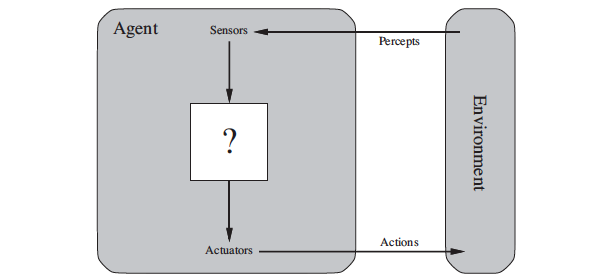

An **`Agent`** is anything that can be viewed as *perceiving* its **`Environment`** through **`Sensors`** and *acting* upon that environment through **`Actuators`**.
> We use the term **`Percept`** to refer to the agent’s *perceptual inputs at any given instant*. 


>An agent’s **`Percept Sequence`** is the complete history of everything the agent has ever perceived. *In general, an agent’s choice of action at any given instant can depend on the entire percept sequence observed to date, but not on anything it hasn’t perceived.*


> We should emphasize that the notion of an **`Agent`** is meant to be a tool for analyzing systems, not an *absolute characterization* that divides the world into **`Agents`** and **`non-Agents`**.



###The **`Agent Function`** vs. **`The Agent Program`**



The Function mapping `Percept Sequences` $\Longrightarrow$ `Actions` is called the <font color='orangered'>**Agent Function**</font>. This function is an `External` characterization of the `Internal` function, which is called the <font color='royalblue'>**Agent Program**</font>.


> The <font color='orangered'>**Agent Function**</font> is an abstract mathematical description; <font color='royalblue'>**Agent Program**</font> is a concrete implementation, running within some physical system.



Given an agent to experiment with, we can, in principle, construct an `Agent Function` table by trying out *all possible percept sequences* and *recording which actions* the agent does in response, like this:

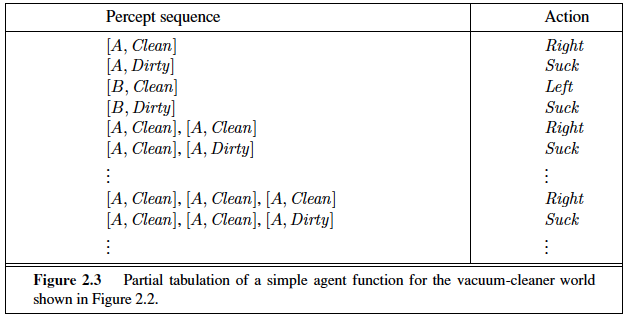

###Good Behavior: The Concept of **`Rationality`**

We evaluate the "goodness" of any `Environment` state using a <font color='goldenrod'>**Performance Measure**</font>.

> Notice that we said `Environment` states, not `Agent` states. If we define "goodness" in terms of `agent’s` opinion of its own performance, an `agent` could achieve perfect `rationality` simply by deluding itself that its `performance` was perfect.

As a general rule, it is better to design `performance measures` according to what one actually wants in the `environment`, rather than according to how one thinks the `agent` should behave.

**`Rationality`**

What is `rational` at any given time depends on four things:

* The `performance measure` that defines the criterion of success.
* The agent’s prior knowledge of the environment.
* The `actions` that the agent can perform.
* The agent’s `percept sequence to date`.

>Thus, for each possible percept sequence, a `Rational Agent` should select an `action` that is expected to maximize its `performance measure`, given the evidence provided by the `percept sequence` and whatever `built-in knowledge` the agent has.

**`NOT Omniscience`**

An omniscient agent knows the actual outcome of its actions and can act  accordingly; but omniscience is **impossible** in reality.

>`Rationality` is not the same as `perfection`. `Rationality` maximizes *expected* performance, while perfection maximizes *actual* performance.

Doing `actions` in order to modify *future* `percepts`, sometimes called **`Information Gathering`**, is an important part of `rationality`. A second example of information gathering is provided by the `exploration` that must be undertaken by an agent in an initially *unknown* `environment`.

Our definition requires a `rational agent` not only to `gather information` but also to learn as much as possible from what it perceives.

**`Autonomous Agents`**

A rational agent should be **`autonomous`** — it should learn what it can to compensate for partial or incorrect prior knowledge.

>As a practical matter, one seldom requires complete `autonomy` from the start: when the `agent` has had little or no experience, it would have to act randomly unless the designer gave some assistance.

>Just as evolution provides animals with enough built-in reflexes to survive long enough to learn for themselves, it would be reasonable to provide an artificial intelligent agent with some initial knowledge as well as an ability to learn. After sufficient experience of its environment, the behavior of a rational agent can become effectively independent of its prior knowledge.
>
>Hence, the incorporation of learning allows one to design a single rational agent that will succeed in a vast variety of environments.

### **`Task Environments`**

We must think about **`task environments`**, which are essentially the “problems” to which `rational agents` are the “solutions.”

In order to describe a `task environment`, we'll use the the **`PEAS description`**.

The **`PEAS description`** of a `task environment` consists of:
1.   **P**erformance
2.   **E**nvironment
3.   **A**ctuators
4.   **S**ensors

>What matters is not the distinction between “real” and “artificial” environments, but the complexity of the relationship among the behavior of the agent, the percept sequence generated by the environment, and the performance measure.



There are several **`Properies of task environments`**.

The range of `task environments` that might arise in AI is obviously vast. We can, however, identify a fairly small number of dimensions along which task environments can be categorized.

*   **`Fully Observable`** vs. **`Partially Observable`**

>If an agent’s sensors give it access to the complete state of the environment at each point in time, then we say that the task environment is fully observable. Fully observable environments are convenient because the agent need
*not* maintain any internal state to keep track of the world.

*   **`Single-agent`** vs. **`Multi-agent`**

>There are many types of Multi-agent environments. Some are competitive (ex: 2p0s games); others are cooperative (sometimes communication even emerges in these environments). Sometimes, competition can result in random actions being taken to avoid the pitfalls of predictability.

*   **`Deterministic`** vs. **`Stochastic`**

>If the next state of the environment is completely determined by the current state and the action executed by the agent, then we say the environment is deterministic; otherwise, it is stochastic.
>
>If the environment is partially observable, however, then it could appear to be stochastic. Most real situations are so complex that it is impossible to keep track of all the unobserved aspects; for practical purposes, they must be treated as stochastic.
>
>We say an environment is uncertain if it is not fully observable or not deterministic.
>
>Our use of the word “stochastic” generally implies that uncertainty about outcomes is quantified in terms of probabilities; a `nondeterministic` environment is one in which actions are characterized by their possible outcomes, but no probabilities are attached to them.

*   **`Episodic`** vs. **`Sequential`**

>In an `episodic` task environment, the agent’s experience is divided into atomic episodes. In each episode the agent receives a percept and then performs a single action. Crucially, the next episode does not depend on the actions taken in previous episodes. Many classification tasks are episodic.

*   **`Static`** vs **`Dynamic`**

>If the environment can change while an agent is deliberating, then we say the environment is `dynamic` for that agent; otherwise, it is `static`; If the environment itself does not change with the passage of time but the agent’s performance score does, then we say the environment is semidynamic.

*   **`Discrete`** vs. **`Continuous`**

>The discrete/continuous distinction applies to the state of the environment, to the way time is handled, and to the percepts and actions of the agent; if any of those spaces is defined as a set of finite items, then that space is discrete; otherwise it is continuous.

*   **`Known`** vs. **`Unknown`**

>Strictly speaking, this distinction refers not to the environment itself but to the agent’s (or designer’s) state of knowledge about the “laws of physics” of the environment. In a known environment, the outcomes (or outcome probabilities if the environment is stochastic) for all actions are given.
>
>It is quite possible for a known environment to be partially observable—for example, in solitaire card games, I know the rules but am still unable to see the cards that have not yet been turned over. Conversely, an unknown environment can be fully observable: in a new video game, the screen may show the entire game state but I still don’t know what the buttons do until I try them.

As one might expect, the hardest case is partially observable, multiagent, stochastic, sequential, dynamic, continuous, and unknown.

>Also, many environments are episodic at higher levels than the agent’s individual actions.

### The **`Structure`** of Agents

An Agent = **`Architecture`** + **`Agent Program`**

There are 4 types of Agent Programs:
* Simple reflex agents;

---

>The simplest kind of agent is the simple reflex agent. These agents select actions on the basis of the current percept, ignoring the rest of the percept history.
>
>Simple reflex behaviors occur even in more complex environments. Imagine yourself as the driver of the automated taxi. If the car in front brakes and its brake lights come on, then you should notice this and initiate braking. In other words, some processing is done on the visual input to establish the condition we call “The car in front is braking.” Then, this triggers some established connection in the agent program to the action “initiate braking.” We call such a connection a condition–action rule.

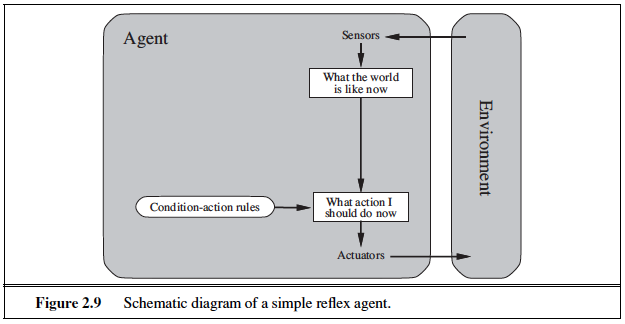

>The agent will work only if the correct decision can be
made on the basis of only the current percept—that is, only if the environment is fully observable!


>A randomized simple reflex agent might outperform a deterministic simple reflex agent. In single-agent environments, randomization is usually not rational. It is a useful trick that helps a simple reflex agent in some situations, but in most cases we can do much better with more sophisticated deterministic agents.

**Model-based reflex agents**

---

The most effective way to handle partial observability is for the agent to keep track of the part of the world it can’t see now. That is, the agent should maintain some sort of **`internal state`** that depends on the percept history and thereby reflects at least some of the unobserved aspects of the current state.

Updating this internal state information as time goes by requires two kinds of knowledge to be encoded in the agent program. 
* First, we need some information about how the world evolves independently of the agent—for example, that an overtaking car generally will be closer behind than it was a moment ago. 
* Second, we need some information about how the agent’s own actions affect the world—for example, that when the agent turns the steering wheel clockwise, the car turns to the right, or that after driving for five minutes northbound on the freeway, one is usually about five miles north of where one was five minutes ago. 

This knowledge about “how the world works”—whether implemented in simple Boolean circuits or in complete scientific theories—is called a model of the world. An agent that uses such a model is called a **`model-based`** agent.

* Model-based reflex agents;
* Goal-based agents; and
* Utility-based agent

* Model-based reflex agents;
* Goal-based agents; and
* Utility-based agents.

##II: Problem Solving

**Chapter 3:** Solving Problems by Searching